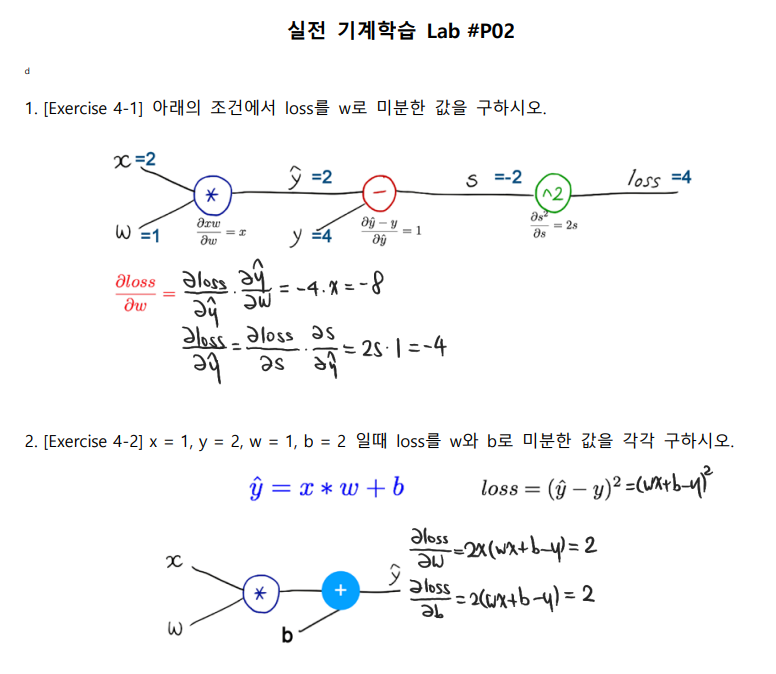

In [1]:
#3
import numpy as np

x = 2
w = 1
y = 4

def forward(x):
  return x * w

def gradient_loss_s(x, y):
  s = forward(x) - y
  return 2 * s

def gradient_s_yhat(x, y):
  return 1

def gradient_loss_yhat(x, y):
  return gradient_loss_s(x, y) * gradient_s_yhat(x, y)

def gradient_yhat_w(x, y):
  return x

def gradient_loss_w(x, y):
  return gradient_loss_yhat(x, y) * gradient_yhat_w(x, y)

print(gradient_loss_w(x, y))

-8


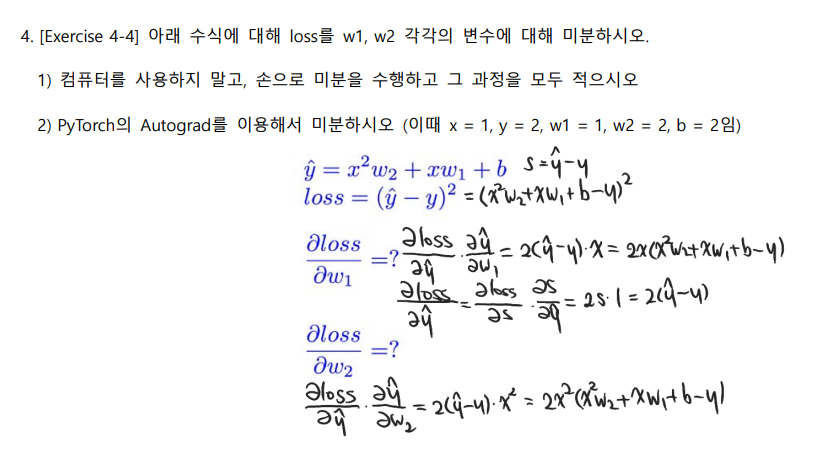

In [2]:
#4 - 2
import torch
import numpy as np

x_data = [1.0]
y_data = [2.0]

w = torch.tensor([[1.0], [2.0]], requires_grad = True)

b = 2

def forward(x):
  return x ** 2 * w[1] + x * w[0] + b

def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) ** 2

l = loss(x_data[0], y_data[0])
l.backward()
print(w.grad)

tensor([[6.],
        [6.]])


#5 - 1
Adagrad  
Adagrad는 adaptive gradient의 줄임말로, 각 파라미터마다 학습률을 조정하여 학습하는 방식이다. 이전 경사값의 제곱합을 누적하여 파라미터의 학습률을 적응적으로 조절하여, 덜 변화하는 파라미터는 더 큰 학습률을 가지고 변화가 큰 파라미터는 작은 학습률을 가지도록 한다.

특징 : Learning rate를 조정하지 않아도 좋음  
이전 경사값을 누적하기 때문에 많은 연산이 필요  
희소한 데이터셋에는 잘 작동하지 않음

Adam  
Adam은 Adaptive Moment Estimation의 약자로, Adagrad와 Momentum 알고리즘의 장점을 합친 알고리즘이다. 파라미터별로 적응적인 학습률을 조절하며, 미분값에 대한 평균과 분산을 고려하여 업데이트를 진행한다.

특징 : Adagrad보다 빠르게 수렴하는 경향이 있음  
Adam은 매우 많은 하이퍼파라미터를 가지고 있어, 이를 최적화하는 것이 어려울 수 있음  
각 하이퍼파라미터에 대한 기본값이 존재함  

Adamax   
Adamax는 Adam의 변형 알고리즘으로, 미분값에 대한 평균 대신 최대값을 사용한다. 따라서, Adam보다 미분값의 변화가 크게 발생하는 경우 더 빠르게 수렴할 수 있습니다.

특징 : 큰 스케일에서 잘 작동함
하이퍼파라미터 튜닝에 대한 가이드라인이 없어서 최적화가 어려울 수 있음

ASGD  
SGD와 유사하지만, 이전의 gradient를 일정 비율만큼 현재 gradient에 섞어서 사용하는 방식이다.

특징 : 이전 gradient의 정보를 일정한 비율만큼 유지하므로, 학습이 진행될수록 현재 gradient의 영향력이 감소하는 단점을 보완할 수 있음


LBFGS  
뉴턴 방법과 공액 최소화 방법을 결합한 방식으로 이전에 계산한 일부 gradient 정보를 저장해두고, 이를 이용하여 Hessian matrix의 근사값을 계산하고 이를 역전파에 사용한다.

특징 : 메모리 제한이 있으며, 대규모 데이터셋에서는 성능이 떨어질 수 있음


RMSprop  
Adagrad와 유사하지만, 학습률을 동적으로 조절하는 방식을 사용하며 기존 gradient의 제곱 값에 대해 지수 평균을 구하고, 학습률을 현재 gradient의 크기와 이 지수 평균의 크기로 나누어 계산한다.

특징 : 이전 gradient가 영향력을 잃어 가면서 학습률이 적절하게 조절되기 때문에, Adagrad보다 안정적으로 학습이 가능함

Rprop  
AdaGrad의 개선 버전으로, adaptive learning rate를 이용한 방식으로 현재 gradient와 이전 gradient의 부호에 따라 학습률을 동적으로 조절한다

특징 : 이전 gradient와 무관하게 현재 gradient의 크기에 따라 학습률이 조절되기 때문에, AdaGrad보다 학습이 더 안정적임

SGD  
SGD는 각 학습 단계에서 일부 샘플을 무작위로 선택하고 해당 샘플에 대한 손실 함수의 기울기를 계산한다. 그런 다음 기울기의 반대 방향으로 일정한 크기의 단계를 이동하여 최적화를 수행한다.

특징 : 각 학습 단계에서 계산량이 적으므로 빠르게 수행할 수 있음  
하이퍼파라미터인 학습률에 매우 민감  
SGD의 단점 중 하나는 local minimum에서 효과적으로 벗어날 수 없다는 것으로 이를 극복하기 위해 다른 최적화 알고리즘(모멘텀, Adagrad, Adam 등)이 개발되었음

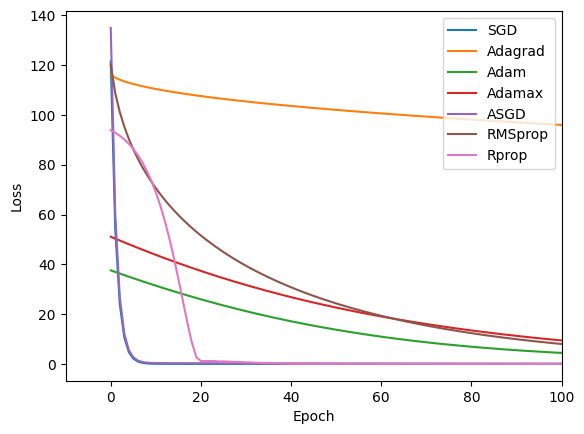

In [3]:
#5 - 2
from torch import nn
import torch
from torch import tensor
import matplotlib.pyplot as plt

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1)

  def forward(self, x):
    y_pred = self.linear(x)

    return y_pred

model_SGD = Model()
model_Adagrad = Model()
model_Adam = Model()
model_Adamax = Model()
model_ASGD = Model()
model_RMSprop = Model()
model_Rprop = Model()

criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer_SGD = torch.optim.SGD(model_SGD.parameters(), lr = 0.01)
optimizer_Adagrad = torch.optim.Adagrad(model_Adagrad.parameters(), lr = 0.01)
optimizer_Adam = torch.optim.Adam(model_Adam.parameters(), lr = 0.01)
optimizer_Adamax = torch.optim.Adamax(model_Adamax.parameters(), lr = 0.01)
optimizer_ASGD = torch.optim.ASGD(model_ASGD.parameters(), lr = 0.01)
optimizer_RMSprop = torch.optim.RMSprop(model_RMSprop.parameters(), lr = 0.01)
optimizer_Rprop = torch.optim.Rprop(model_Rprop.parameters(), lr = 0.01)

epoch_val = []
loss_val_SGD = []
loss_val_Adagrad = []
loss_val_Adam = []
loss_val_Adamax = []
loss_val_ASGD = []
loss_val_RMSprop = []
loss_val_Rprop = []

for epoch in range(500):
  y_pred = model_SGD(x_data)

  loss_SGD = criterion(y_pred, y_data)

  optimizer_SGD.zero_grad()
  loss_SGD.backward()
  optimizer_SGD.step()

  epoch_val.append(epoch)
  loss_val_SGD.append(loss_SGD.item())

for epoch in range(500):
  y_pred = model_Adagrad(x_data)

  loss_Adagrad = criterion(y_pred, y_data)

  optimizer_Adagrad.zero_grad()
  loss_Adagrad.backward()
  optimizer_Adagrad.step()

  loss_val_Adagrad.append(loss_Adagrad.item())

for epoch in range(500):
  y_pred = model_Adam(x_data)

  loss_Adam = criterion(y_pred, y_data)

  optimizer_Adam.zero_grad()
  loss_Adam.backward()
  optimizer_Adam.step()

  loss_val_Adam.append(loss_Adam.item())

for epoch in range(500):
  y_pred = model_Adamax(x_data)

  loss_Adamax = criterion(y_pred, y_data)

  optimizer_Adamax.zero_grad()
  loss_Adamax.backward()
  optimizer_Adamax.step()

  loss_val_Adamax.append(loss_Adamax.item())

for epoch in range(500):
  y_pred = model_ASGD(x_data)

  loss_ASGD = criterion(y_pred, y_data)

  optimizer_ASGD.zero_grad()
  loss_ASGD.backward()
  optimizer_ASGD.step()

  loss_val_ASGD.append(loss_ASGD.item())

for epoch in range(500):
  y_pred = model_RMSprop(x_data)

  loss_RMSprop = criterion(y_pred, y_data)

  optimizer_RMSprop.zero_grad()
  loss_RMSprop.backward()
  optimizer_RMSprop.step()

  loss_val_RMSprop.append(loss_RMSprop.item())

for epoch in range(500):
  y_pred = model_Rprop(x_data)

  loss_Rprop = criterion(y_pred, y_data)

  optimizer_Rprop.zero_grad()
  loss_Rprop.backward()
  optimizer_Rprop.step()

  loss_val_Rprop.append(loss_Rprop.item())

hour_var = tensor([[4.0]])
y_pred = model_SGD(hour_var)

plt.plot(epoch_val, loss_val_SGD, label = 'SGD')
plt.plot(loss_val_Adagrad, label = 'Adagrad')
plt.plot(loss_val_Adam, label = "Adam")
plt.plot(loss_val_Adamax, label = "Adamax")
plt.plot(loss_val_ASGD, label = "ASGD")
plt.plot(loss_val_RMSprop, label = "RMSprop")
plt.plot(loss_val_Rprop, label = "Rprop")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim(-10, 100)
plt.legend(loc = 'upper right')
plt.show()

#6 - 1
ReLU(Rectified Linear Unit)  
함수 형태: f(x) = max(0,x)  
함수의 미분 형태: f'(x) = 0 (if x < 0), f'(x) = 1 (if x >= 0)  
특징: 입력이 0보다 작을 때는 출력이 0이 되며, 0보다 클 때는 입력과 동일한 값을 출력한다.  
  
ReLU6  
함수 형태: f(x) = min(max(0,x),6)  
함수의 미분 형태: f'(x) = 0 (if x < 0), f'(x) = 1 (if 0 <= x <= 6), f'(x) = 0 (if x > 6)  
특징: ReLU 함수와 유사하나, 출력값이 6을 넘지 않는다는 차이점이 있다.  
  
ELU(Exponential Linear Unit)  
함수 형태: f(x) = x (if x >= 0), f(x) = alpha * (exp(x) - 1) (if x < 0)  
함수의 미분 형태: f'(x) = 1 (if x >= 0), f'(x) = f(x) + alpha (if x < 0)  
특징: 입력값이 음수일 때에도 0이 아닌 값을 가지며, ReLU의 단점인 dying ReLU 문제를 해결할 수 있다.  
  
SeLU(Scaled Exponential Linear Unit)  
함수 형태: f(x) = scale * (x if x >= 0 else alpha * (exp(x) - 1))  
함수의 미분 형태: f'(x) = scale * (1 if x >= 0 else f(x) + alpha)  
특징: ELU와 유사하게 dying ReLU 문제를 해결할 수 있으며, 입력값의 분포를 자동으로 조정하여 학습 성능을 향상시킬 수 있다.  
  
PReLU(Parametric Rectified Linear Unit)  
함수 형태: f(x) = max(0,x) + alpha * min(0,x)  
함수의 미분 형태: f'(x) = 1 (if x > 0), f'(x) = alpha (if x <= 0)  
특징: 기존의 ReLU 함수에서 음수 부분을 학습 가능한 파라미터로 대체하여, 더욱 정교한 모델링이 가능하다.  
  
Leaky ReLU  
함수 형태: f(x) = max(alpha*x,x)  
함수의 미분 형태: f'(x) = 1 (if x >= 0), f'(x) = alpha (if x < 0)  
특징: ReLU와 유사하지만 dying ReLU 문제를 해결하고자 음수 영역에서도 작은 기울기를 가진다.  
  
threshold 함수  
함수 형태: f(x) = x if x > threshold, else 0  
미분 형태: 미분이 정의되지 않음  
특징: 임계값(threshold)을 기준으로 0 또는 입력값을 반환함. 분류 문제에서 자주 사용됨.  
  
hardtanh 함수  
함수 형태: f(x) = max(min(x, max_val), min_val)  
미분 형태: 미분이 정의되지 않는 구간을 제외하면 상수값을 반환함  
특징: 입력값을 -1과 1 사이의 값으로 잘라내는 역할을 함. ReLU와 유사하지만, 경계값에서 미분 가능하고, 구간을 제외하면 상수값을 반환하여 학습 안정성에 도움을 줌.

/usr/local/lib/python3.9/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


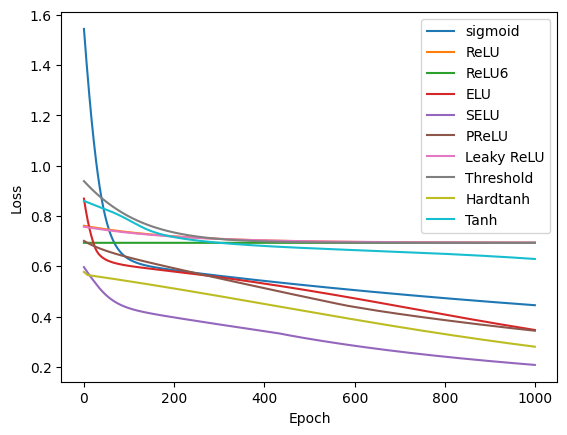

In [4]:
#6 - 2
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])

class Model_sigmoid(nn.Module):
  def __init__(self):
    super(Model_sigmoid, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    y_pred = sigmoid(self.linear(x))
    return y_pred

class Model_relu(nn.Module):
  def __init__(self):
    super(Model_relu, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_relu6(nn.Module):
  def __init__(self):
    super(Model_relu6, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.relu6(self.linear1(x))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_elu(nn.Module):
  def __init__(self):
    super(Model_elu, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.elu(self.linear1(x))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_selu(nn.Module):
  def __init__(self):
    super(Model_selu, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.selu(self.linear1(x))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_prelu(nn.Module):
  def __init__(self):
    super(Model_prelu, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.prelu(self.linear1(x), tensor([0.01]))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_leaky_relu_(nn.Module):
  def __init__(self):
    super(Model_leaky_relu_, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.leaky_relu_(self.linear1(x))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_threshold(nn.Module):
  def __init__(self):
    super(Model_threshold, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.threshold(self.linear1(x), 1, -1)
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_hardtanh(nn.Module):
  def __init__(self):
    super(Model_hardtanh, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.hardtanh(self.linear1(x))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

class Model_tanh(nn.Module):
  def __init__(self):
    super(Model_tanh, self).__init__()
    self.linear1 = nn.Linear(1, 1)
    self.linear2 = nn.Linear(1, 1)

  def forward(self, x):
    x = F.tanh(self.linear1(x))
    y_pred = sigmoid(self.linear2(x))
    return y_pred

model_sigmoid = Model_sigmoid()
model_relu = Model_relu()
model_relu6 = Model_relu6()
model_elu = Model_elu()
model_selu = Model_selu()
model_prelu = Model_prelu()
model_leaky_relu_ = Model_leaky_relu_()
model_threshold = Model_threshold()
model_hardtanh = Model_hardtanh()
model_tanh = Model_tanh()

criterion = nn.BCELoss(size_average = True, reduction = 'mean')
optimizer_sigmoid = optim.SGD(model_sigmoid.parameters(), lr = 0.01)
optimizer_relu = optim.SGD(model_relu.parameters(), lr = 0.01)
optimizer_relu6 = optim.SGD(model_relu6.parameters(), lr = 0.01)
optimizer_elu = optim.SGD(model_elu.parameters(), lr = 0.01)
optimizer_selu = optim.SGD(model_selu.parameters(), lr = 0.01)
optimizer_prelu = optim.SGD(model_prelu.parameters(), lr = 0.01)
optimizer_leaky_relu_ = optim.SGD(model_leaky_relu_.parameters(), lr = 0.01)
optimizer_threshold = optim.SGD(model_threshold.parameters(), lr = 0.01)
optimizer_hardtanh = optim.SGD(model_hardtanh.parameters(), lr = 0.01)
optimizer_tanh = optim.SGD(model_tanh.parameters(), lr = 0.01)

epoch_val = []
loss_val_sigmoid = []
loss_val_relu = []
loss_val_relu6 = []
loss_val_elu = []
loss_val_selu = []
loss_val_prelu = []
loss_val_leaky_relu_ = []
loss_val_threshold = []
loss_val_hardtanh = []
loss_val_tanh = []

for epoch in range(1000):
  y_pred = model_sigmoid(x_data)

  loss_sigmoid = criterion(y_pred, y_data)

  optimizer_sigmoid.zero_grad()
  loss_sigmoid.backward()
  optimizer_sigmoid.step()

  epoch_val.append(epoch)
  loss_val_sigmoid.append(loss_sigmoid.item())

for epoch in range(1000):
  y_pred = model_relu(x_data)

  loss_relu = criterion(y_pred, y_data)

  optimizer_relu.zero_grad()
  loss_relu.backward()
  optimizer_relu.step()

  loss_val_relu.append(loss_relu.item())

for epoch in range(1000):
  y_pred = model_relu6(x_data)

  loss_relu6 = criterion(y_pred, y_data)

  optimizer_relu6.zero_grad()
  loss_relu6.backward()
  optimizer_relu6.step()

  loss_val_relu6.append(loss_relu6.item())

for epoch in range(1000):
  y_pred = model_elu(x_data)

  loss_elu = criterion(y_pred, y_data)

  optimizer_elu.zero_grad()
  loss_elu.backward()
  optimizer_elu.step()

  loss_val_elu.append(loss_elu.item())

for epoch in range(1000):
  y_pred = model_selu(x_data)

  loss_selu = criterion(y_pred, y_data)

  optimizer_selu.zero_grad()
  loss_selu.backward()
  optimizer_selu.step()

  loss_val_selu.append(loss_selu.item())

for epoch in range(1000):
  y_pred = model_prelu(x_data)

  loss_prelu = criterion(y_pred, y_data)

  optimizer_prelu.zero_grad()
  loss_prelu.backward()
  optimizer_prelu.step()

  loss_val_prelu.append(loss_prelu.item())

for epoch in range(1000):
  y_pred = model_leaky_relu_(x_data)

  loss_leaky_relu_ = criterion(y_pred, y_data)

  optimizer_leaky_relu_.zero_grad()
  loss_leaky_relu_.backward()
  optimizer_leaky_relu_.step()

  loss_val_leaky_relu_.append(loss_leaky_relu_.item())

for epoch in range(1000):
  y_pred = model_threshold(x_data)

  loss_threshold = criterion(y_pred, y_data)

  optimizer_threshold.zero_grad()
  loss_threshold.backward()
  optimizer_threshold.step()

  loss_val_threshold.append(loss_threshold.item())

for epoch in range(1000):
  y_pred = model_hardtanh(x_data)

  loss_hardtanh = criterion(y_pred, y_data)

  optimizer_hardtanh.zero_grad()
  loss_hardtanh.backward()
  optimizer_hardtanh.step()

  loss_val_hardtanh.append(loss_hardtanh.item())

for epoch in range(1000):
  y_pred = model_tanh(x_data)

  loss_tanh = criterion(y_pred, y_data)

  optimizer_tanh.zero_grad()
  loss_tanh.backward()
  optimizer_tanh.step()

  loss_val_tanh.append(loss_tanh.item())

plt.plot(epoch_val, loss_val_sigmoid, label = "sigmoid")
plt.plot(loss_val_relu, label = "ReLU")
plt.plot(loss_val_relu6, label = "ReLU6")
plt.plot(loss_val_elu, label = "ELU")
plt.plot(loss_val_selu, label = "SELU")
plt.plot(loss_val_prelu, label = "PReLU")
plt.plot(loss_val_leaky_relu_, label = "Leaky ReLU")
plt.plot(loss_val_threshold, label = "Threshold")
plt.plot(loss_val_hardtanh, label = "Hardtanh")
plt.plot(loss_val_tanh, label = "Tanh")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc = "upper right")
plt.show()